In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
covertdImgdir = '/content/gdrive/My Drive/Theses_Landslides/Data/HR_GLDD_Dataset/HRGLDD_Images/'

In [ ]:
train_images_path = '/content/gdrive/My Drive/Theses_Landslides/Data/HR_GLDD_Dataset/NPY_Files/trainX.npy'

In [ ]:
train_labels_path = '/content/gdrive/My Drive/Theses_Landslides/Data/HR_GLDD_Dataset/NPY_Files/trainY.npy'

val_images_path = '/content/gdrive/My Drive/Theses_Landslides/Data/HR_GLDD_Dataset/NPY_Files/valX.npy'
val_labels_path = '/content/gdrive/My Drive/Theses_Landslides/Data/HR_GLDD_Dataset/NPY_Files/valY.npy'

test_images_path = '/content/gdrive/My Drive/Theses_Landslides/Data/HR_GLDD_Dataset/NPY_Files/testX.npy'
test_labels_path = '/content/gdrive/My Drive/Theses_Landslides/Data/HR_GLDD_Dataset/NPY_Files/testY.npy'

60% for training, 20% for validation and 20% for testing

In [ ]:
X_train = np.load(train_images_path)
y_train = np.load(train_labels_path)

X_val = np.load(val_images_path)
y_val = np.load(val_labels_path)

X_test = np.load(test_images_path)
y_test = np.load(test_labels_path)

In [ ]:
print(f"X_train: {X_train.shape}, Y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, Y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, Y_test: {y_test.shape}")

X_train: (1119, 128, 128, 4), Y_train: (1119, 128, 128, 1)
X_val: (284, 128, 128, 4), Y_val: (284, 128, 128, 1)
X_test: (355, 128, 128, 4), Y_test: (355, 128, 128, 1)


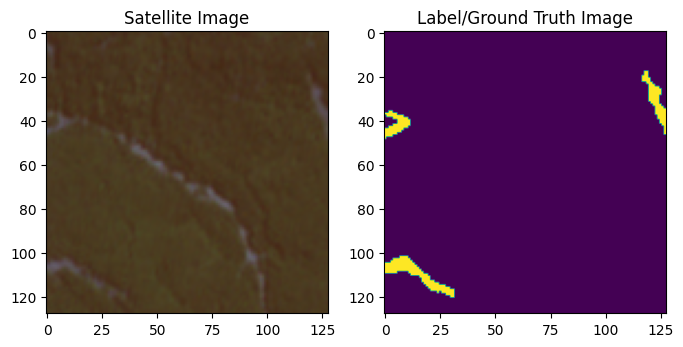

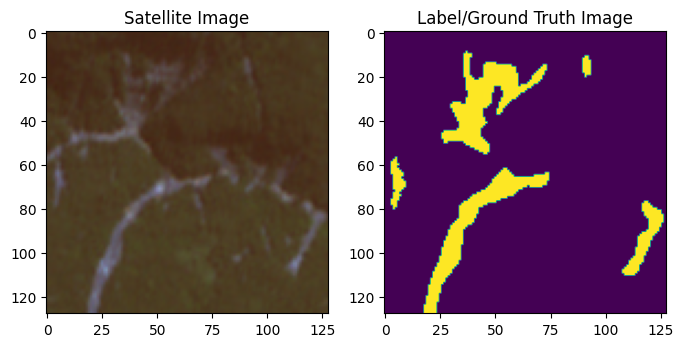

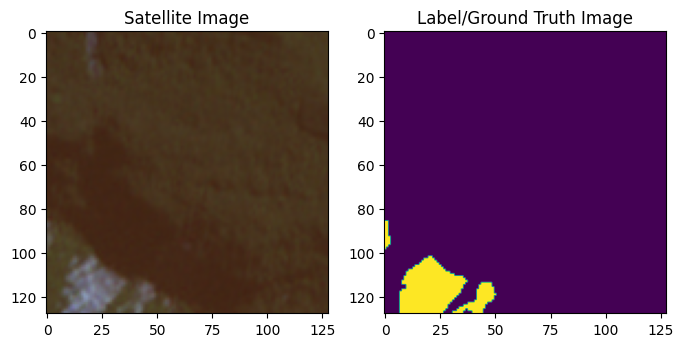

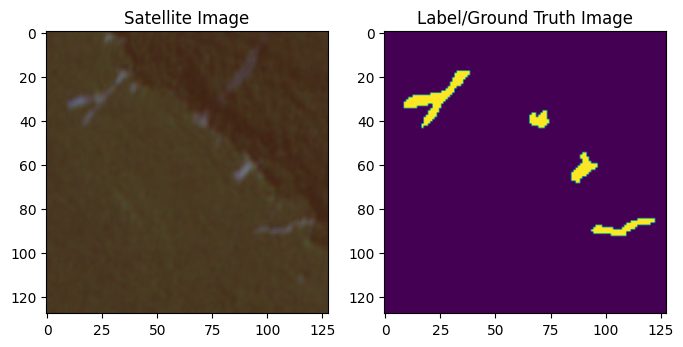

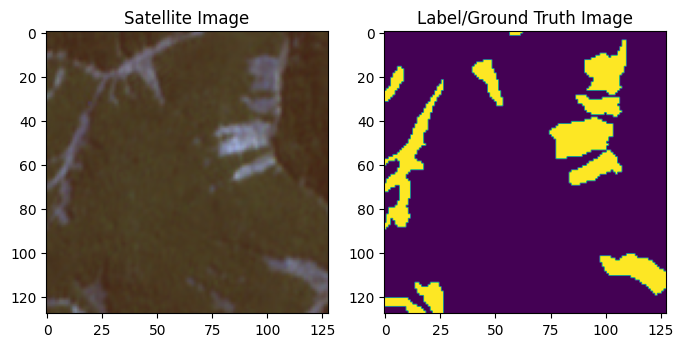

In [ ]:
for i in range(5):
    f, axarr = plt.subplots(1,2,figsize=(8,8))
    axarr[0].imshow(X_train[i][:,:,:3])
    axarr[0].set_title("Satellite Image")
    axarr[1].imshow(np.squeeze(y_train[i]))
    axarr[1].set_title("Label/Ground Truth Image")

In [ ]:
Y_train = (np.mean(y_train, axis=(1, 2, 3)) > 0.1).astype(int).reshape(-1, 1)
Y_val = (np.mean(y_val, axis=(1, 2, 3)) > 0.1).astype(int).reshape(-1, 1)
Y_test = (np.mean(y_test, axis=(1, 2, 3)) > 0.1).astype(int).reshape(-1, 1)

In [ ]:
from tensorflow.keras.layers import Input

As the images are RGB, near-infrared (NIR) hence the input shape for model is kept as (128,128, 4) so that ResNet50V2 accepts it as input.As the Input shape accepted by ResNet50V2 is (224,224,3) 224 pixel wide and 224 pixel high and 3 color channel(RGB).

In [ ]:
input_shape = (128, 128, 4)
input_tensor = Input(shape=input_shape)
base_model = ResNet50V2(include_top=False, input_tensor=input_tensor, weights=None)

In [ ]:
base_model.trainable = False

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
#from tensorflow.keras import backend as K
#from tensorflow.keras.metrics import Precision, Recall, F1Score

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)
checkpoint_cb = ModelCheckpoint(filepath='/content/gdrive/My Drive/Theses_Landslides/Models/CNN_MODEL/ResNet_model.h5',monitor='val_loss',save_best_only=True,verbose=1)

In [ ]:
history=None

In [ ]:
resnetm = Sequential()

resnetm.add(base_model)

resnetm.add(GlobalAveragePooling2D())

resnetm.add(Dense(256, activation='relu'))

resnetm.add(Dropout(0.5))

resnetm.add(Dense(1, activation='sigmoid'))

In [ ]:
resnetm.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=resnetm.fit(X_train, Y_train,validation_data=(X_val, Y_val),epochs=50,batch_size=32,callbacks=[earlystopping, lr,checkpoint_cb])

Epoch 1/50
35/35 [==============================] - ETA: 0s - loss: 0.6812 - accuracy: 0.6381
Epoch 1: val_loss improved from 60.18224 to 0.67850, saving model to /content/gdrive/My Drive/LandslideModelsV3_1/CNN_MODEL/ResNet_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 [==============================] - 13s 287ms/step - loss: 0.6812 - accuracy: 0.6381 - val_loss: 0.6785 - val_accuracy: 0.6268 - lr: 1.0000e-04
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 0.6689 - accuracy: 0.6604
Epoch 2: val_loss improved from 0.67850 to 0.67427, saving model to /content/gdrive/My Drive/LandslideModelsV3_1/CNN_MODEL/ResNet_model.h5
35/35 [==============================] - 8s 235ms/step - loss: 0.6689 - accuracy: 0.6604 - val_loss: 0.6743 - val_accuracy: 0.6268 - lr: 1.0000e-04
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.6625 - accuracy: 0.6604
Epoch 3: val_loss improved from 0.67427 to 0.67179, saving model to /content/gdrive/My Drive/LandslideModelsV3_1/CNN_MODEL/ResNet_model.h5
35/35 [==============================] - 8s 232ms/step - loss: 0.6625 - accuracy: 0.6604 - val_loss: 0.6718 - val_accuracy: 0.6268 - lr: 1.0000e-04
Epoch 4/50
35/35 [==============================] - ETA: 0s - loss: 0.6596 - accuracy: 0.

In [ ]:
resnetm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 4, 4, 2048)        23567936  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 24092737 (91.91 MB)
Trainable params: 524801 (2.00 MB)
Non-trainable params: 23567936 (89.90 MB)
_________

In [ ]:
resnetm.save_weights('/content/gdrive/My Drive/Theses_Landslides/Models/CNN_MODEL/ResNet_model.weights.h5')

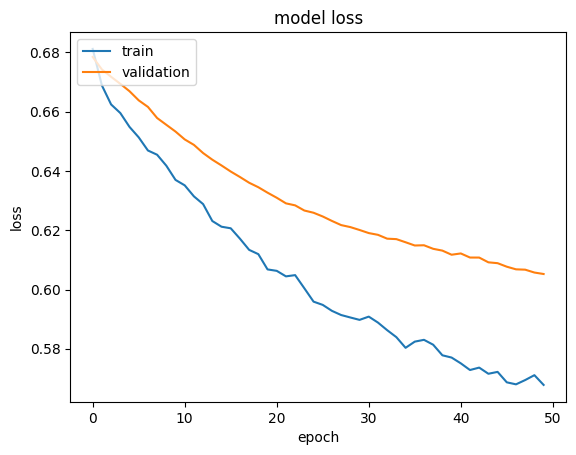

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

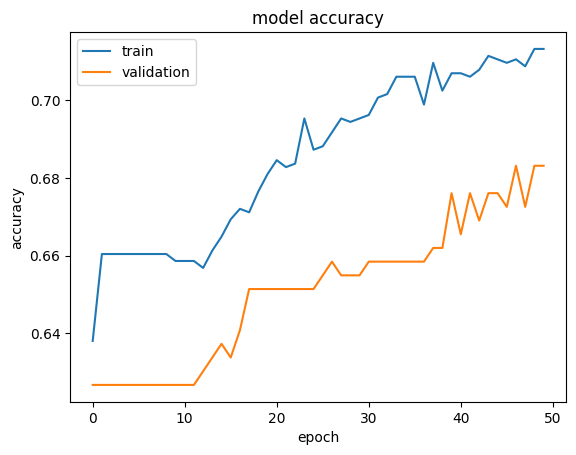

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
loss_testdata, acc_testdata = resnetm.evaluate(X_test, Y_test)
print(f"Test Loss: {loss_testdata}")
print(f"Test Accuracy: {acc_testdata}")

12/12 [==============================] - 2s 156ms/step - loss: 0.5941 - accuracy: 0.6789
Test Loss: 0.5941277742385864
Test Accuracy: 0.6788732409477234


ResNet_model.weights